In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
import seaborn as sns
sns.set(style="darkgrid")

csv_url = "https://raw.githubusercontent.com/samcoogan/CA660_Statistical_Analysis/main/new_houses_ireland.csv"
df = pd.read_csv(csv_url)

pd.options.display.max_rows = 6
df.set_index("Year")

,Ireland,Dublin,Cork,Galway,Limerick,Waterford,Other Areas
Year,,,,,,,
1971,7523,7913,6632,6976,6012,6105,6427
1972,8249,8528,7676,8867,6733,6227,7198
1973,9009,9206,7678,9405,7450,6928,8054
...,...,...,...,...,...,...,...
2013,228216,300466,240063,218308,206456,154051,207573
2014,246378,333720,242099,218016,208442,177122,214404
2015,281432,377741,255010,241058,232791,213506,226231


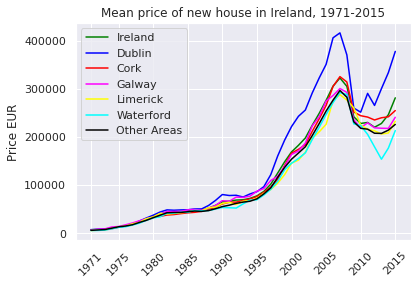

In [ ]:
# Generate labels for x-axis 
xticks = [1971,1975,1980,1985,1990,1995,2000,2005,2010,2015]
xlabels = ["1971","1975","1980","1985","1990","1995","2000","2005","2010","2015"]

plt.rcParams["figure.figsize"] = (6,4)
df.plot(kind="line", x="Year", y=["Ireland","Dublin","Cork","Galway","Limerick","Waterford","Other Areas"],color=["green","blue","red","magenta","yellow","cyan","black"], ylabel="Price EUR", title="Mean price of new house in Ireland, 1971-2015", xlabel="")
plt.xticks(xticks,xlabels,rotation=45)
plt.show()

In [ ]:
# Create regression model using National price as training data
reg = linear_model.LinearRegression()
reg.fit(df[['Year']],df['Ireland'])

LinearRegression()

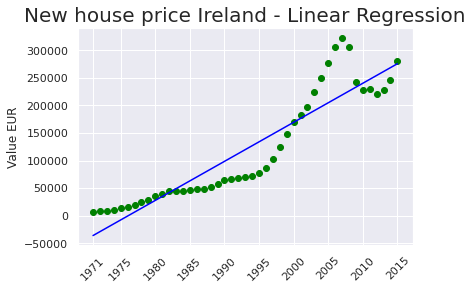

In [ ]:
# Plot Linear Regression model line for Ireland
plt.scatter(x=df.Year,y=df["Ireland"],color="green")
plt.plot(df.Year,reg.predict(df[['Year']]),color="blue")
plt.title("New house price Ireland - Linear Regression",fontsize=20)
plt.ylabel("Value EUR")
plt.xticks(xticks,xlabels,rotation=45)
plt.show()

In [ ]:
# Create csv to store prediction values
dfn = pd.DataFrame([2020,2021,2022,2023,2024,2025,2030,2040],columns=["Year"])
dfn.to_csv("predictions.csv", index=False)

In [ ]:
dfn = pd.read_csv("predictions.csv")

In [ ]:
# Create year dataframe to calculate predictions
yeardf = pd.DataFrame([2020,2021,2022,2023,2024,2025,2030,2040],columns=["Year"])

In [ ]:
# Create Linear Regression model using data for each other, save to dataframe
reg = linear_model.LinearRegression()
reg.fit(df[['Year']],df['Ireland'])
p = reg.predict(yeardf)
dfn['Ireland'] = p

reg = linear_model.LinearRegression()
reg.fit(df[['Year']],df['Dublin'])
dublinp = reg.predict(yeardf)
dfn['Dublin'] = dublinp

reg = linear_model.LinearRegression()
reg.fit(df[['Year']],df['Cork'])
corkp = reg.predict(yeardf)
dfn['Cork'] = corkp

reg = linear_model.LinearRegression()
reg.fit(df[['Year']],df['Galway'])
galwayp = reg.predict(yeardf)
dfn['Galway'] = galwayp

reg = linear_model.LinearRegression()
reg.fit(df[['Year']],df['Limerick'])
limerickp = reg.predict(yeardf)
dfn['Limerick'] = limerickp

reg = linear_model.LinearRegression()
reg.fit(df[['Year']],df['Waterford'])
waterfordp = reg.predict(yeardf)
dfn['Waterford'] = waterfordp

reg = linear_model.LinearRegression()
reg.fit(df[['Year']],df['Other Areas'])
otherp = reg.predict(yeardf)
dfn['Other Areas'] = otherp

In [ ]:
# Round float numbers, convert to integers
dfn = dfn.round()
dfn = dfn.astype({"Ireland":'int', "Dublin":'int', 'Cork':'int', 'Galway':'int', 'Limerick':'int', 'Waterford':'int', 'Other Areas':'int'}) 

In [ ]:
dfn.to_csv("predictions.csv", index=False)

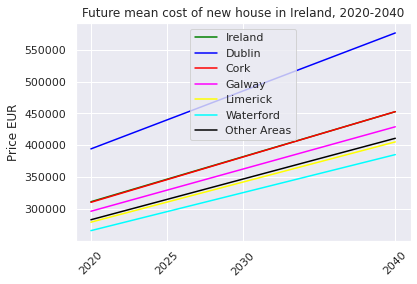

In [ ]:
plt.rcParams["figure.figsize"] = (6,4)
xticks = [2020,2025,2030,2040]
xlabels = ["2020","2025","2030","2040"]
#plt.xticks(xticks,xlabels,rotation=90)
dfn.plot(kind="line", x="Year", y=["Ireland","Dublin","Cork","Galway","Limerick","Waterford","Other Areas"],color=["green","blue","red","magenta","yellow","cyan","black"], ylabel="Price EUR", title="Future mean cost of new house in Ireland, 2020-2040", xlabel="")
plt.xticks(xticks,xlabels,rotation=45)
plt.show()

In [ ]:
pd.options.display.max_rows = 8
dfn.set_index("Year")

,Ireland,Dublin,Cork,Galway,Limerick,Waterford,Other Areas
Year,,,,,,,
2020,311160,394302,310243,296161,278982,265681,282809
2021,318244,403422,317377,302807,285298,271662,289217
2022,325327,412542,324511,309453,291614,277643,295624
2023,332411,421663,331645,316099,297930,283624,302032
2024,339494,430783,338779,322745,304245,289605,308439
2025,346578,439903,345913,329392,310561,295586,314847
2030,381996,485505,381582,362622,342140,325491,346884
2040,452833,576709,452921,429083,405298,385301,410958


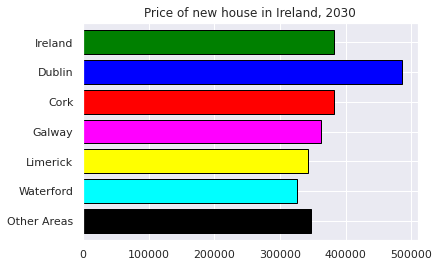

In [ ]:
dfn2030 = dfn[dfn['Year']==2030]
dfn2030 = dfn2030.drop(dfn2030.columns[0],axis=1)
dfn2030.sum().plot(kind='barh',width=0.8,edgecolor ="black",x=["National","Dublin","Cork","Galway","Limerick","Waterford","Other"],color=["green","blue","red","magenta","yellow","cyan","black"],title="Price of new house in Ireland, 2030",stacked=True).invert_yaxis()
